In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import optimize
from scipy.signal import medfilt

In [3]:
plt.style.use('ggplot')
dataset = pd.read_csv('ExoTrain.csv')
y = dataset['LABEL']-1
X = dataset.drop(['LABEL'], axis=1)

In [4]:
def plot_series(series, title, figsize=(15, 5), xlabel=None, ylabel=None, mode='o'):
    
    median = np.median(series)
    std = np.std(series)
    plt.figure(figsize=figsize)
    plt.plot(series,mode, markersize=3)
#     plt.plot((median+3*std)*np.ones(len(series)), '-')
    plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    plt.show()

In [5]:
index = 2799
flux = X.values[index]
time = np.arange(len(flux))

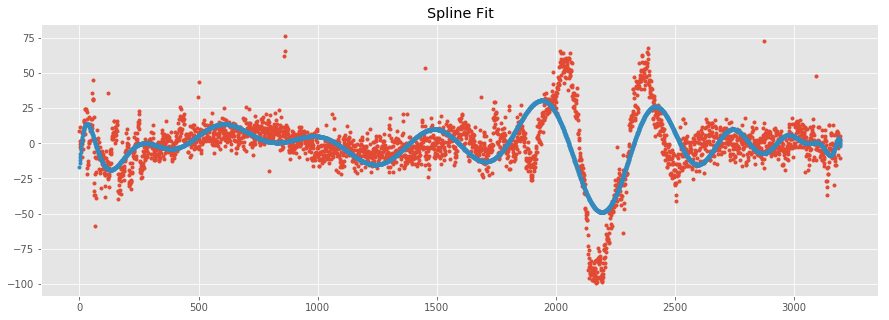

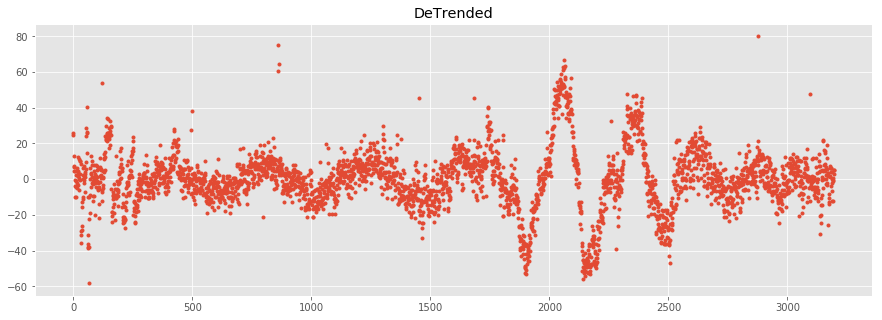

In [8]:
plot_series(np.vstack([flux, spline_fit]).T, "Spline Fit")
plot_series(flux-spline_fit, "DeTrended")

In [9]:
fitfunc = lambda p, x: p[0]*np.cos(p[1]*x+p[2]) #+ p[3+0]*np.cos(p[3+1]*x+p[3+2]) # + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [500., 100., 0.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(flux, time))
print (p1, success)

(array([-46.48514504,  99.98930086,   1.52822858]), 1)


In [10]:
sine_fit = fitfunc(p1, flux)

In [11]:
# plot_series(np.vstack([flux, sine_fit]).T, "Spline Fit", mode='-')
# plot_series(flux-sine_fit, "DeTrended")

In [12]:
from PyAstronomy.pyasl import binningx0dt


In [13]:
outbins = binningx0dt(time, flux, reduceBy=10)
# print outbins


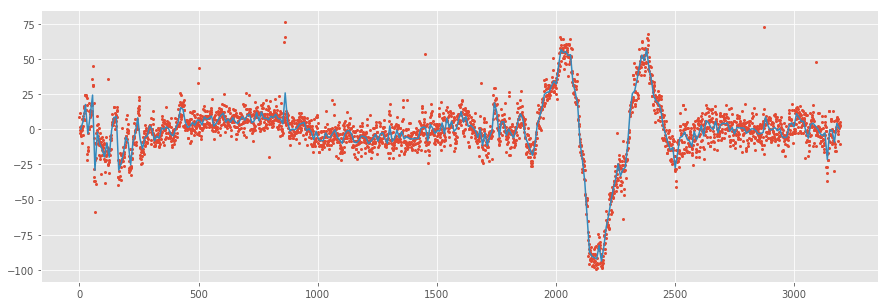

In [14]:
plt.figure(figsize=(15,5))
plt.plot(time, flux, 'o', markersize=2)
plt.plot(outbins[0][:,0], outbins[0][:,1], '-', markersize=2)
plt.show()

Number of outliers:  10
Indices of outliers:  [2169, 2195, 2172, 2163, 2193, 2192, 2151, 2158, 2171, 2194]
        R      Lambda
 1   4.49190   4.31352
 2   4.45985   4.31345
 3   4.46489   4.31338
 4   4.46077   4.31331
 5   4.46208   4.31324
 6   4.45229   4.31317
 7   4.46642   4.31309
 8   4.45421   4.31302
 9   4.46510   4.31295
10   4.46955   4.31288


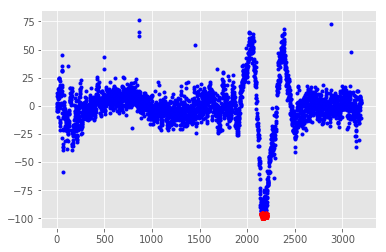

In [15]:

from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl


x = flux

# Apply the generalized ESD
r = pyasl.generalizedESD(x, 10, 0.05, fullOutput=True)

print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
  print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.plot(x, 'b.')
# and mark the outliers.
for i in range(r[0]):
  plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.show()

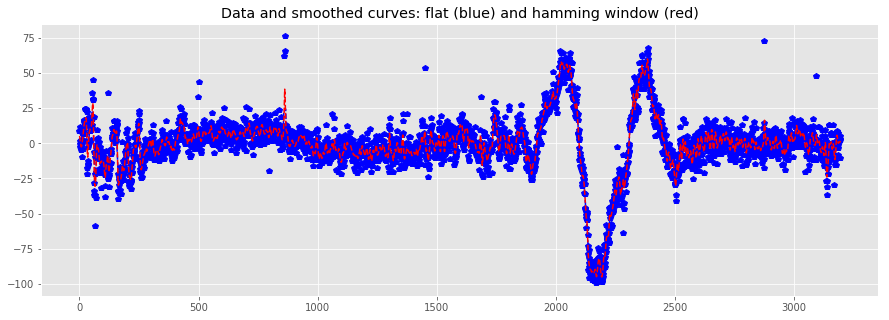

In [16]:
from PyAstronomy import pyasl
import numpy as np
import matplotlib.pylab as plt

# Create same "data" using a sine
# and random noise
x = time
y = flux
# y += np.random.normal(0.0, 0.2, len(y))

# Use two smoothing windows with the same
# window size
sm1 = pyasl.smooth(y, 11, 'flat')
sm2 = pyasl.smooth(y, 11, 'hamming')

# Plot the outcome
plt.figure(figsize=(15,5))
plt.title("Data and smoothed curves: flat (blue) and hamming window (red)")
plt.plot(x, y, 'bp')
plt.plot(x, sm1, 'b--')
plt.plot(x, sm2, 'r--')
plt.show()

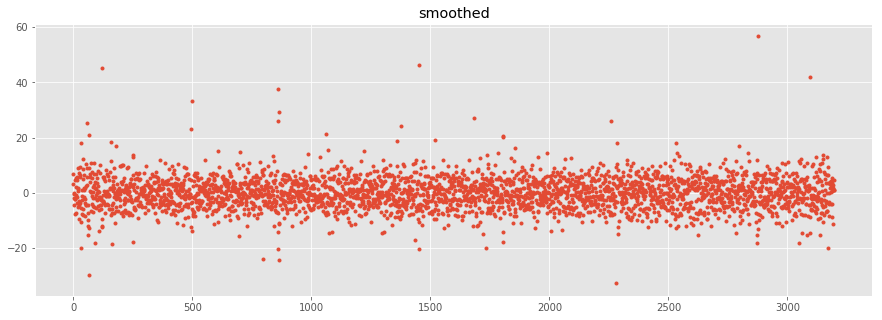

In [17]:
plot_series(flux-sm2, 'smoothed')
